---
title: "Classification Of The Fastest Creatures"
from: markdown+emoji
---

# About
Animals can be classified in a general sense as follows:

* :cat2: Land Animals
* :bird: Air Animals
* :fish: Water Animals

Is there another strange place where animals might be found?! No, we are not talking about creatures existing in multidimensions like the ... :grin:!

This is a simple classification model using the concepts taught in [Lesson 1](lesson_01.ipynb) that classifies the fastest animals on land, air, and water- namely **cheetah**, **falcon**, and **sailfish**.

---

# Step 0: Getting Started

We begin by installing `fastbook` and `duckduckgo_search`. `fastbook` provides us all the `fastai` librarires we need to build our classification model and we use `duckduckgo_search` to get our image data. We will be searching images of these animals and downloading them from [DuckDuckGo](https://duckduckgo.com/).

In [1]:
!pip install -Uqq fastbook duckduckgo_search

     |████████████████████████████████| 719 kB 15.4 MB/s 
     |████████████████████████████████| 5.3 MB 57.1 MB/s 
     |████████████████████████████████| 1.3 MB 53.4 MB/s 
     |████████████████████████████████| 441 kB 67.2 MB/s 
     |████████████████████████████████| 1.6 MB 58.4 MB/s 
     |████████████████████████████████| 96 kB 6.7 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 212 kB 71.8 MB/s 
     |████████████████████████████████| 163 kB 71.0 MB/s 
     |████████████████████████████████| 115 kB 51.7 MB/s 
     |████████████████████████████████| 127 kB 28.1 MB/s 
     |████████████████████████████████| 115 kB 54.8 MB/s 
     |████████████████████████████████| 7.6 MB 45.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is inc

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

# Step 1: Searching & Downloading The Images

We begin by searching and downloading one image to check and see if it looks good! We store these images in files for later use!

### Cheetah

In [3]:
urls = search_images('cheetah', max_images=1)
urls[0]

Searching for 'cheetah'


'https://worldwideexperience.com/wp-content/uploads/2019/10/cheetah.jpg'

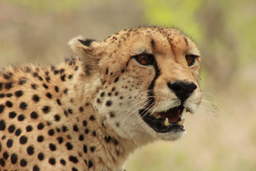

In [4]:
from fastdownload import download_url
dest = 'cheetah.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Looks good!

### Falcon

Searching for 'falcon'


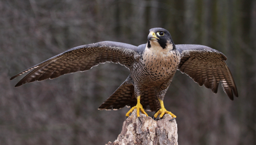

In [5]:
download_url(search_images('falcon', max_images=1)[0], 'falcon.jpg', show_progress=False)
Image.open('falcon.jpg').to_thumb(256,256)

Looks good!

### Sailfish

Searching for 'sailfish'


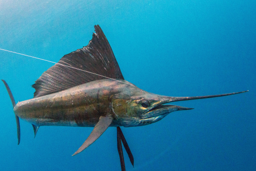

In [6]:
download_url(search_images('sailfish', max_images=1)[0], 'sailfish.jpg', show_progress=False)
Image.open('sailfish.jpg').to_thumb(256,256)

This looks good as well!

Now let us download a bunch of images of all these 3 animals and resize them.

In [7]:
searches = ['cheetah', 'falcon', 'sailfish']
path = Path('which_fastest_creature')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(o))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'cheetah'
Searching for 'falcon'
Searching for 'sailfish'


Let us check if their are anybroken links.

In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

There seems none!

# Step 2: Create DataBlock

Now that we have all the images, we now have to find a way with which we can load this data into our classification model. 

This can be done as follows.

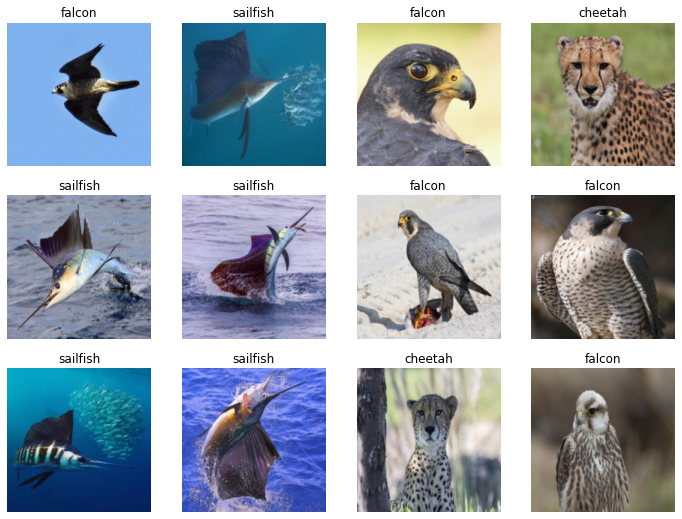

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

# Step 3: Load Data In The Model & Fine-Tune It

In the previous step our data was ready to be loaded in the model. Now we load it and fine-tune the model, meaning making the model *learn* about these images.

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.963578,0.741912,0.235294,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.746984,0.193328,0.117647,00:01
1,0.459601,0.007541,0.000000,00:00
2,0.326408,0.003072,0.000000,00:00


# Step 4: Check!

Our model is ready! Let us check it by putting the images we stored earlier.

### Cheetah

In [11]:
which_fastest_creature,_,probs = learn.predict(PILImage.create('cheetah.jpg'))
print(f"This is a: {which_fastest_creature}.")
print(f"Probability: {probs[0]:.4f}")

This is a: cheetah.
Probability: 0.9995


Looks impressive!

### Falcon

In [12]:
which_fastest_creature,_,probs = learn.predict(PILImage.create('falcon.jpg'))
print(f"This is a: {which_fastest_creature}.")
print(f"Probability: {probs[1]:.4f}")

This is a: falcon.
Probability: 0.9999


This looks great as well!

### Sailfish

In [13]:
which_fastest_creature,_,probs = learn.predict(PILImage.create('sailfish.jpg'))
print(f"This is a: {which_fastest_creature}.")
print(f"Probability: {probs[2]:.4f}")

This is a: sailfish.
Probability: 0.9925


Nicely done!

Aaaannnnd we are done!